In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# Random generator 
rng = np.random.default_rng()

## *Randomization*

### Two datasets

In [96]:
# We begin with two datasets, A and B
A = rng.normal(5, 2.5, 100)
B = rng.normal(5.5, 2.5, 100)

# We then calculate the means of each dataset
mean_A = np.mean(A)
mean_B = np.mean(B)

print('The means of A and B are, ' + str(mean_A) + ' and ' + str(mean_B) + ', respectively.')

# And, for the sake of illustration, also calculate the difference between these means

diff_means = mean_A - mean_B

print('The difference of means is, ' + str(diff_means) + '.')

The means of A and B are, 5.018298975147697 and 5.523457752844396, respectively.
The difference of means is, -0.5051587776966988.


### Resampling

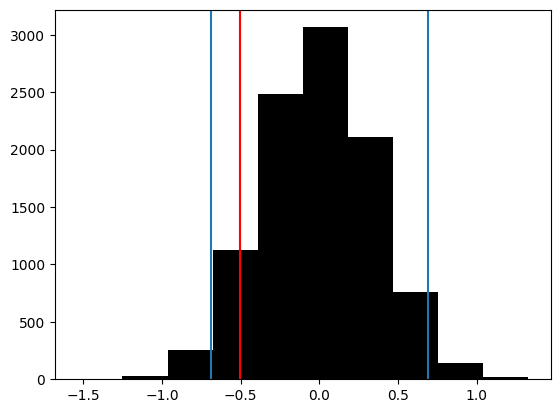

In [107]:
# First, how many times do we want to resample?
number_runs = 10000

# Next, we create an array that will store the difference of means
array_of_diffs = np.zeros([number_runs, 1])

# To ease computational burden, let's declare some variables
# A combined list of A and B
combined = np.concatenate((A, B))
# Length of A and B
length_A = len(A)

# Okay, now, for each run:
for i in range(number_runs):
    # Let us shuffle the combined list
    # Note that shuffle works in place!
    rng.shuffle(combined)
    # Now, split the list into A and B, maintaining their original sizes
    # Notice the slice syntax!
    new_A = combined[0:length_A]
    new_B = combined[length_A:len(combined)]
    # Calculate and store a difference of means
    array_of_diffs[i] = np.mean(new_A) - np.mean(new_B)


### Plotting and using the array of differences

In [ ]:
# Now, plot up the array of diffs
plt.hist(array_of_diffs, color='black')

# Now, given an alpha of 0.05, can we accept or reject the null hypothesis of no difference in means?

alpha = 0.05
lower_critical_value = np.quantile(array_of_diffs, alpha/2)
upper_critical_value = np.quantile(array_of_diffs, 1-(alpha/2))

# Plot the critical values and the observed value
plt.axvline(x = diff_means, color='r')
plt.axvline(x = lower_critical_value)
plt.axvline(x = upper_critical_value)

# Show your plot
plt.show()

In [214]:
# We begin with a dataset where two variables are strongly correlated
correlated_data= np.random.multivariate_normal([0, 0], [[1, -.75], [-.75, 1]], 1000)

# The correlation matrix of the first and second columns of correlated_data
correlation_matrix = np.corrcoef(correlated_data[:, 0], correlated_data[:, 1])

# Check the correlation coefficient
print('The correlation coefficient is: ' + str(correlation_matrix[0,1]) + '.')

The correlation coefficient is: -0.7432037675053205.


The correlation coefficient is: -0.658422643211491.


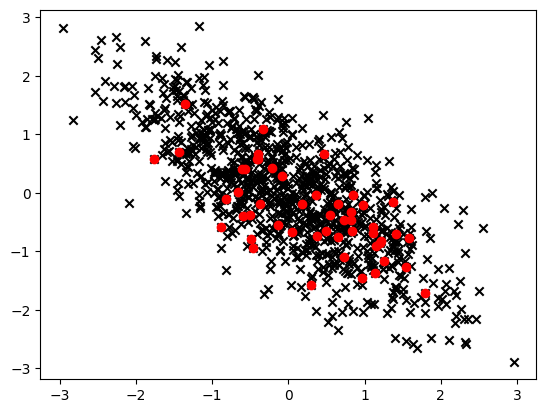

In [218]:
# Next, let's take some subset of the correlated data

subset = rng.choice(correlated_data, size=50, replace=False)

# Report the correlation coefficient of the subsets
print('The correlation coefficient is: ' + str(np.corrcoef(subset[:,0], subset[:, 1])[0,1]) + '.')

# Plot up the original data vs. the samples we ended up taking
plt.scatter(correlated_data[:, 0], correlated_data[:, 1], marker='x', c='black')
plt.scatter(subset[:,0], subset[:, 1], c='red')
plt.show()

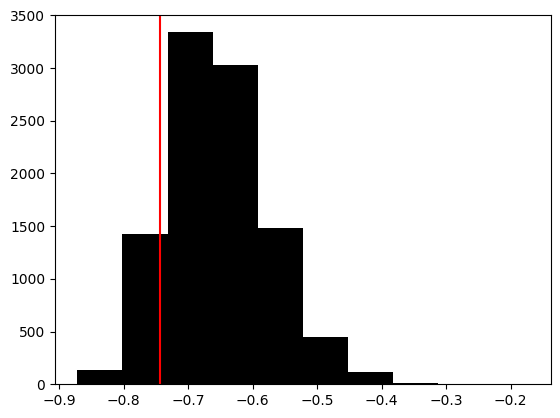

In [233]:
# Now, we'd like to bootstrap the correlation coefficient of the subset. Remember, the subset represents our sample of the true population.

# Once again, we create an array that will keep track of the outputs of our resampling loop. In this case, we just want to record the correlation coefficient of each new sample. 

corr_coef_collector = np.zeros([number_runs, 1])

# Let's also get the length of the subset
length_sub = len(subset)

# Now, for each run
for i in range(number_runs):
    # We want to draw length_sub samples WITH REPLACEMENT
    new_pairs = rng.choice(subset, size=length_sub, replace=True)
    # Calculate and store the correlation coefficient
    corr_coef_collector[i] = np.corrcoef(new_pairs[:, 0], new_pairs[:, 1])[0,1]

# Plot up the corr_coef_collector values
plt.hist(corr_coef_collector, color='black')

# Show the true correlation coefficient
plt.axvline(x=correlation_matrix[0,1], color='red')

plt.show()